# 3. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

# Introduction

## Import of necessary libraries


In [1425]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
import numpy as np
import netCDF4 as nc
import seaborn as sns
from scipy.stats import weibull_min
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, root_mean_squared_error

## Declaring function

In [1426]:
def resample_interpolate_wind_direction(df, resample_method='mean', interpolate_method='linear'):
    
    # Convert wind direction to radians
    radians = np.radians(df)
    
    # Calculate sine and cosine components
    sin_component = np.sin(radians)
    cos_component = np.cos(radians)

    # Resample sine and cosine components separately
    sin_resampled = sin_component.resample('1h').apply(resample_method)
    cos_resampled = cos_component.resample('1h').apply(resample_method)

    # Interpolate sine and cosine components separately
    sin_interpolated = sin_resampled.interpolate(method=interpolate_method)
    cos_interpolated = cos_resampled.interpolate(method=interpolate_method)
    
    # Calculate interpolated wind direction from sine and cosine components
    interpolated_radians = np.arctan2(sin_interpolated, cos_interpolated)
    
    # Convert radians back to degrees
    interpolated_degrees = np.degrees(interpolated_radians)
    
    # Ensure wind direction is within the range [0, 360)
    interpolated_degrees = interpolated_degrees % 360
    
    return interpolated_degrees


###

def fit_weibull(df, column=None, boxplot=False):
    if column is None:
        column = df.columns[0]
        
    data = df[column]
    shape, loc, scale = weibull_min.fit(data, loc=0)
    
    plt.figure(figsize=(15, 4))

    # Plot the histogram of the original data
    plt.subplot(1, 2, 1)
    plt.hist(data, density=True, bins=20, alpha=0.5, label='Data')

    # Generate x-values for the PDF plot
    x = np.linspace(0, np.max(data), 100)

    # Plot the PDF of the fitted Weibull distribution
    plt.plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-', label='Fitted Weibull PDF')

    # Add labels and legend
    plt.xlabel(column)
    plt.ylabel('Probability Density')
    plt.legend()
    
    if boxplot:
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
    
    # Show the plot
    plt.show()
    
    return pd.Series((shape, loc, scale), index=['k: shape', 'loc', 'a: scale'])

###

def weibull(data):
    for col in data:
        if data[col].dtype == 'float64':
            print(col)
            print(fit_weibull(data, col))

###

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    
###

def get_cardinal_direction(degrees):
    if degrees < 22.5 or degrees >= 337.5:
        return 'N'
    elif 22.5 <= degrees < 67.5:
        return 'NE'
    elif 67.5 <= degrees < 112.5:
        return 'E'
    elif 112.5 <= degrees < 157.5:
        return 'SE'
    elif 157.5 <= degrees < 202.5:
        return 'S'
    elif 202.5 <= degrees < 247.5:
        return 'SW'
    elif 247.5 <= degrees < 292.5:
        return 'W'
    elif 292.5 <= degrees < 337.5:
        return 'NW'
    
###

def plot_real_vs_predicted(y_test, pred_test, var_name, title):

    plt.plot(y_test.index, y_test, label='Real data')
    plt.plot(y_test.index, pred_test, label='Predicted data')
    plt.xlabel('Time')
    plt.ylabel(var_name)
    plt.title(title)

    # x ticks display only every fourth month
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=4))
    # Format x-axis tick labels as month-year
    plt.gca().xaxis.set_major_formatter(DateFormatter('%b-%Y'))

    plt.legend()

    plt.show()

###

def plot_feature_importances(regressor, X):

    feature_importances = regressor.coef_
    plt.bar(X.columns, feature_importances)
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature importances')
    plt.show()

## Data import

In [1427]:
file_path_risoe_nc = 'Data/Risoe/risoe_m_all.nc'
file_path_risoe_csv = 'Data/Risoe/meso_Risoe.csv'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']

# Get the Risoe dataset:
mast_risoe = nc.Dataset(file_path_risoe_nc, 'r')

# List the variables in the dataset
print("Variables in the netCDF file:")
for var_name in mast_risoe.variables:
    print(var_name)


Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc


# Mast dataset preparation


## Preparing of the time to be used as an index

In [1428]:
time_var = mast_risoe.variables['time']

print("Time attributes:")
for attr in time_var.ncattrs():
    print(f"{attr}: {getattr(time_var, attr)}")

if 'timezone' in time_var.ncattrs():
    print("Timezone:", time_var.timezone)
else:
    print("No explicit timezone attribute found.")

Time attributes:
units: minutes since 1995-11-20 16:25:00
calendar: proleptic_gregorian
No explicit timezone attribute found.


In [1429]:
# Convert NetCDF time values to datetime objects
time_values = nc.num2date(time_var[:], units=time_var.units)

# Convert the time values to a pandas Series
time_index = pd.to_datetime([t.strftime('%Y-%m-%d %H:%M:%S') for t in time_values])
print(f"time: {time_index[1]} - {time_index[-1]}")

time: 1995-11-20 16:35:00 - 2007-12-31 23:56:00


In [1430]:
time = pd.Series(time_index.tz_localize('Europe/Copenhagen', ambiguous=False, nonexistent='NaT'))

print(f"time:\n {time.iloc[1]} - {time.iloc[-1]}")

# Convert to UTC to check for DST transitions
time_utc = time.dt.tz_convert('UTC')
dst_changes = time != time_utc

print("\nDST transitions:")
print(dst_changes[dst_changes])

# Count DST transitions
print("\nNumber of DST transitions:", dst_changes.sum())

time:
 1995-11-20 16:35:00+01:00 - 2007-12-31 23:56:00+01:00

DST transitions:
18922     True
18923     True
18924     True
18925     True
18926     True
          ... 
588660    True
588661    True
588662    True
588663    True
588664    True
Length: 72, dtype: bool

Number of DST transitions: 72


That means we should have 72 NaT values to be removed.

In [1431]:
# Check for NaT values in the time series
nat_count = time_utc.isna().sum()
print(f"Number of NaT values in time: {nat_count}")

Number of NaT values in time: 72


As guessed we have 72 NaT values which will be removed in our Dataset after we use time as index.

## Choosing the mast data heights, clearing time and putting as index

In [1432]:
df_mast_risoe = pd.DataFrame()
df_mast_risoe['time'] = time_utc
df_mast_risoe['ws77'] = np.array(mast_risoe.variables['ws77'])
df_mast_risoe['wd77'] = np.array(mast_risoe.variables['wd77'])
df_mast_risoe['ws125'] = np.array(mast_risoe.variables['ws125'])
df_mast_risoe['wd125'] = np.array(mast_risoe.variables['wd125'])

# Remove records where time is NaT
df_mast_risoe = df_mast_risoe.dropna(subset=['time'])

# Print records where time is NaT
print(f"Records where time is NaT: {df_mast_risoe['time'].isna().sum()}")

Records where time is NaT: 0


In [1433]:

df_mast_risoe['time'] = pd.to_datetime([t.strftime('%Y-%m-%d %H:%M:%S') for t in df_mast_risoe['time']])

df_mast_risoe.set_index('time', inplace=True)

# display last 25 rows
df_mast_risoe.tail(10)

,ws77,wd77,ws125,wd125
time,,,,
2007-12-31 21:26:00,8.14,0.0,NaN,0.0
2007-12-31 21:36:00,8.71,0.0,NaN,0.0
2007-12-31 21:46:00,6.82,0.0,NaN,0.0
2007-12-31 21:56:00,7.26,0.0,NaN,0.0
2007-12-31 22:06:00,7.24,0.0,NaN,0.0
2007-12-31 22:16:00,6.04,0.0,NaN,0.0
2007-12-31 22:26:00,6.97,0.0,NaN,0.0
2007-12-31 22:36:00,8.17,0.0,NaN,0.0
2007-12-31 22:46:00,6.66,0.0,NaN,0.0


# Handle missing values


## Observation of NaN values

Checking how many NaN values the data has and where they are

In [1434]:
print(f"Amount of NAN values: \n{df_mast_risoe.isna().sum()}")

Amount of NAN values: 
ws77      6752
wd77       548
ws125    86642
wd125    69517
dtype: int64


It can be seen that the 125 height has a lot of missing values. After plotting a heatmap, it can be seen that most of the NaN values are in 2007, which means that the dataset can be cut if we want to use the 125 height at a later stage.

The 77 height data looks much cleaner as it has only around 7,000 missing values. For now, we will stick with it.

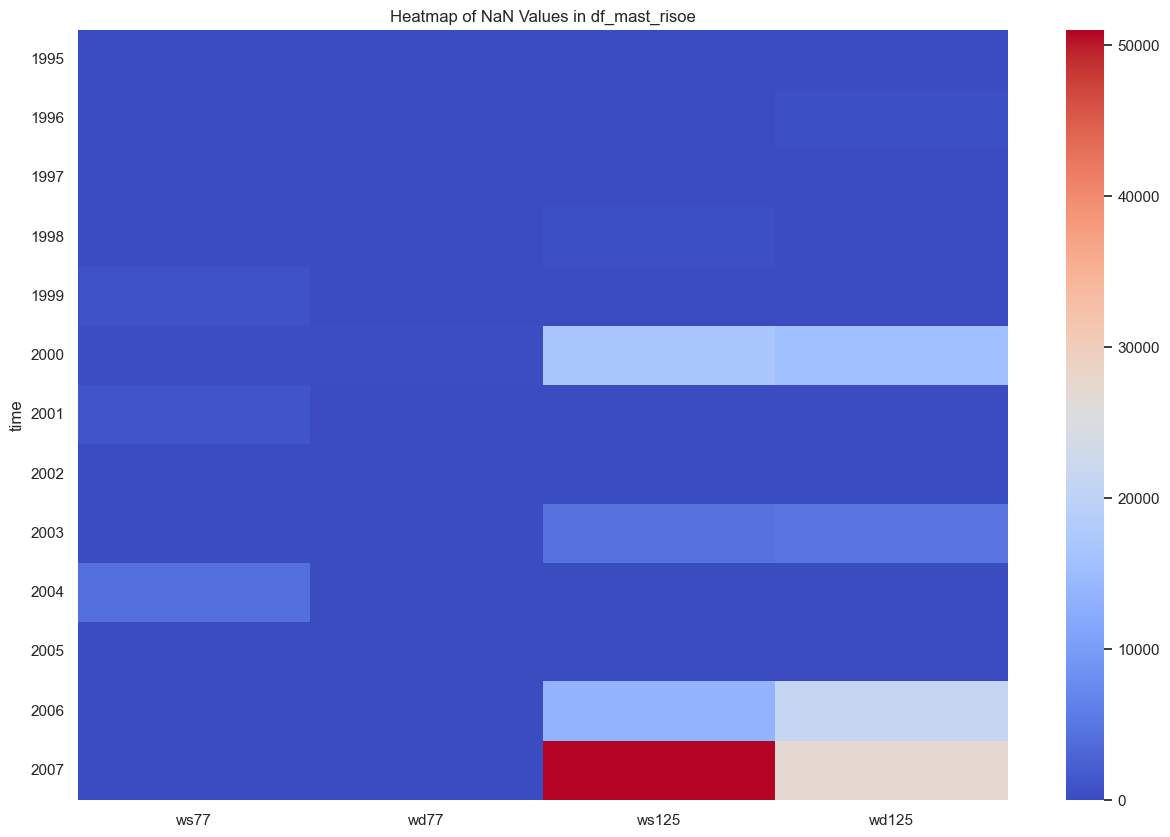

In [1435]:
# Create a heatmap to highlight NaN values
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_mast_risoe.isna().resample('YE').sum(), cmap='coolwarm')
plt.title('Heatmap of NaN Values in df_mast_risoe')

# Set the y-axis labels to show only the years
ax.set_yticklabels([tick.year for tick in df_mast_risoe.resample('YE').sum().index], rotation=0)
plt.show()
plt.show()


## Decision to work with 77 height

As the dataset is about wind and it is continuous data, the interpolation method for filling the NaN values was chosen.

In [1436]:

# Drop the 125 columns
mast_risoe_77 = df_mast_risoe.drop(columns = ['ws125','wd125'])

In [1437]:
mast_risoe_77.describe()

,ws77,wd77
count,621535.000000,627739.000000
mean,6.882227,193.135964
std,3.297707,98.183830
min,0.000000,0.000000
25%,4.550000,119.000000
50%,6.630000,209.000000
75%,8.830000,274.000000
max,32.170000,360.000000


From the description, we can see that there is moderate variability of 3.33 for the wind speed, although the variability for the direction of the wind seems much higher as it is 98.20. For both direction and speed, the mean is close to the median, which means that they will have a relatively symmetric distribution, although the direction will be slightly skewed towards higher values. Also, the minimum value for the ws77 is 0, so next we will check how many 0 values there are.

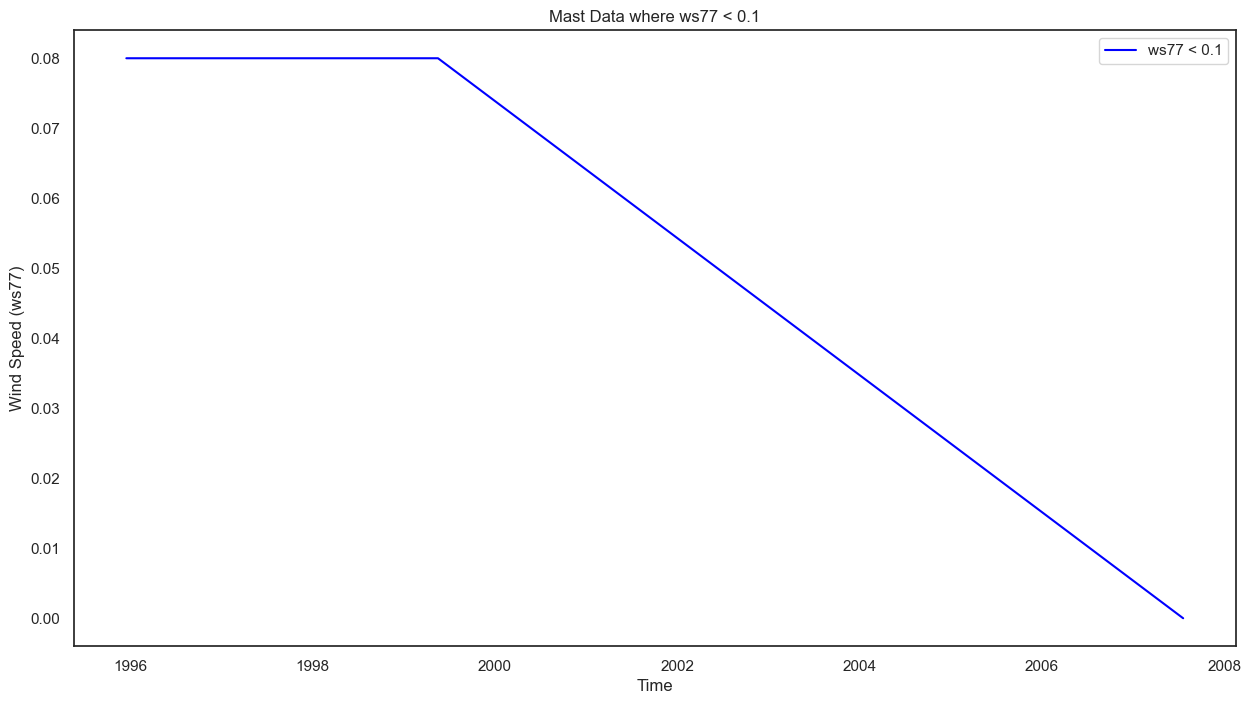

Zero values for ws77: 1


In [1438]:
# Filter the data where ws77 is 0
ws77_near_zero = mast_risoe_77[mast_risoe_77['ws77'] < 0.1]

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(ws77_near_zero.index, ws77_near_zero['ws77'], label='ws77 < 0.1', color='blue')
plt.xlabel('Time')
plt.ylabel('Wind Speed (ws77)')
plt.title('Mast Data where ws77 < 0.1')
plt.legend()
plt.show()

print(f"Zero values for ws77: {mast_risoe_77[mast_risoe_77['ws77'] == 0]['ws77'].count().sum()}")

The graph and the printed text show that the zero values are just one, which probably won't influence the model as the value is at the end of the set and it is not sure if we will use it.

The next step will be to see the number of outliers in our data.

# Work with Mast data

## Wind speed resample

First, we resample wind speed into a new DataFrame column.

In [1439]:
# resample the ws77 data to 1 hour intervals 
resampled_wind_speed = mast_risoe_77[['ws77']].resample('1h').mean()

resampled_wind_speed = resampled_wind_speed.interpolate(method='time')

resampled_wind_speed.isna().sum()


ws77    0
dtype: int64

Plot it to see if it looks correct.

array([<Axes: xlabel='time'>], dtype=object)

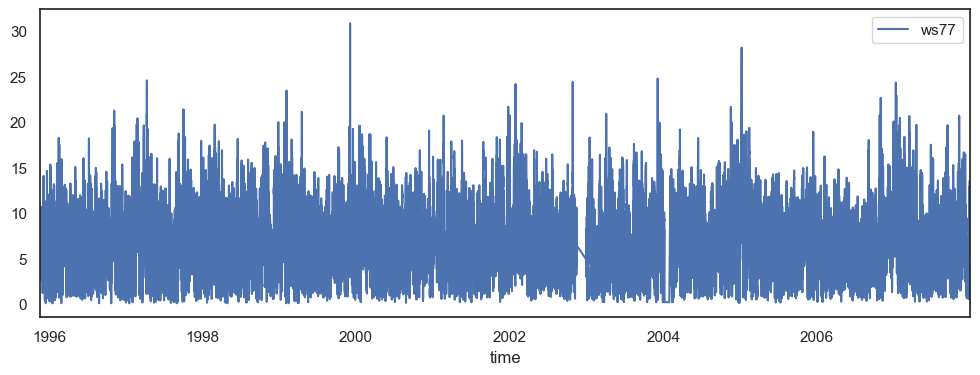

In [1440]:
# plot resampled_scaled_mast_risoe

resampled_wind_speed.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

## Wind speed Weibull fit and outliers plotting

Wind speed variance is low and the distribution looks okay, so we are deciding to keep the outliers.


C:\Users\Dotev\AppData\Local\Temp\ipykernel_29716\3061411745.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ws77_outlier_count = resampled_wind_speed[(df_mast_risoe['ws77'] < lower_bound) | (resampled_wind_speed['ws77'] > upper_bound)].count()['ws77']


ws77 outlier count: 78


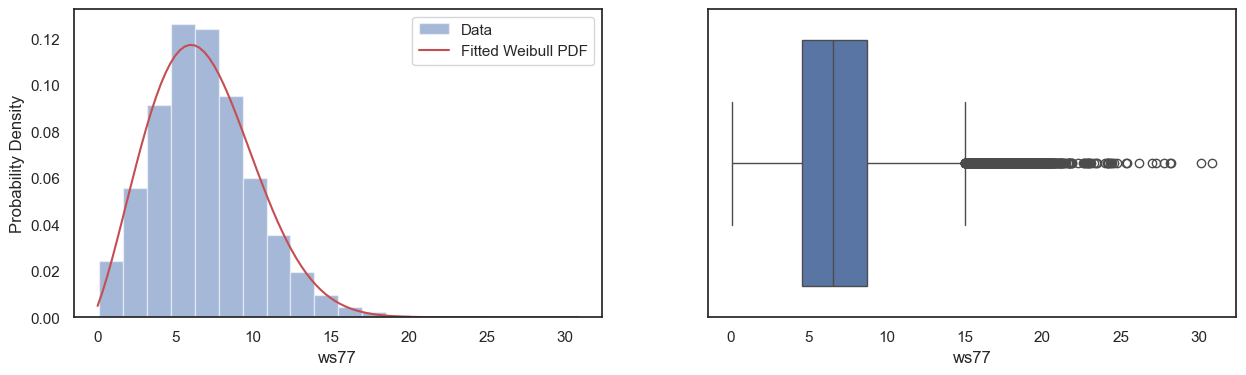

k: shape    2.323554
loc        -0.376125
a: scale    8.125527
dtype: float64

In [1441]:
# calculate ouliers

q1 = df_mast_risoe['ws77'].quantile(0.25)
q3 = df_mast_risoe['ws77'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
ws77_outlier_count = resampled_wind_speed[(df_mast_risoe['ws77'] < lower_bound) | (resampled_wind_speed['ws77'] > upper_bound)].count()['ws77']
print(f'ws77 outlier count: {ws77_outlier_count}')

fit_weibull(resampled_wind_speed, 'ws77', boxplot=True)

## Wind direction resample

To resample the wind direction, we have to use a different approach since it is circular data. We use the mean of the sine and cosine of the wind direction to get the mean direction.

First, we write a function for the wind resampling, so it can be reused if needed.

Then we plot to see how the wind data looks like.

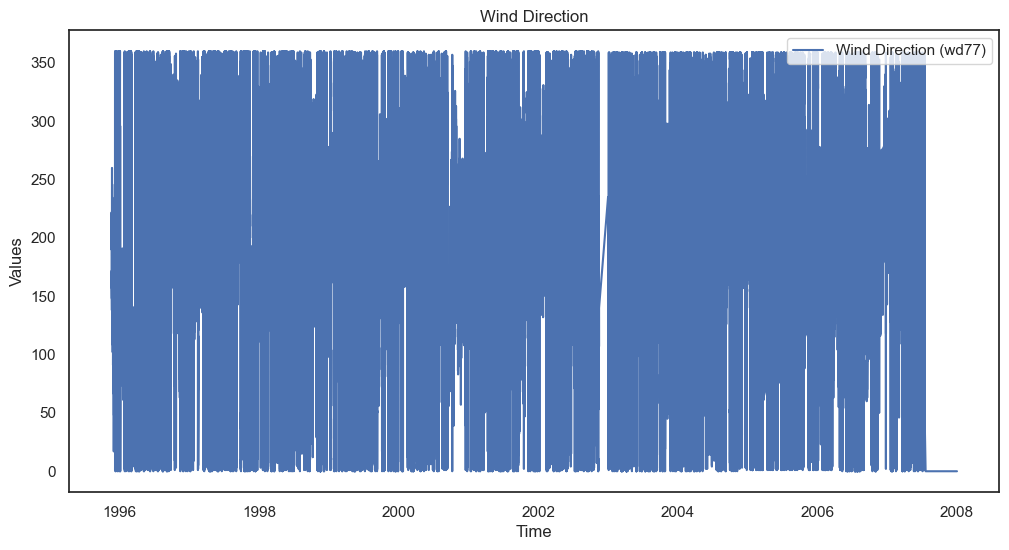

In [1442]:
wind_direction = mast_risoe_77[['wd77']]

plt.figure(figsize=(12, 6))
plt.plot(wind_direction.index, wind_direction, label='Wind Direction (wd77)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Wind Direction')
plt.legend()
plt.show()

We can spot the wind direciton in the end of 2007 is poiting only 0 which probably is some malfunctioning. We will slice that periods for the wind direction and will correct also for the wind speed.

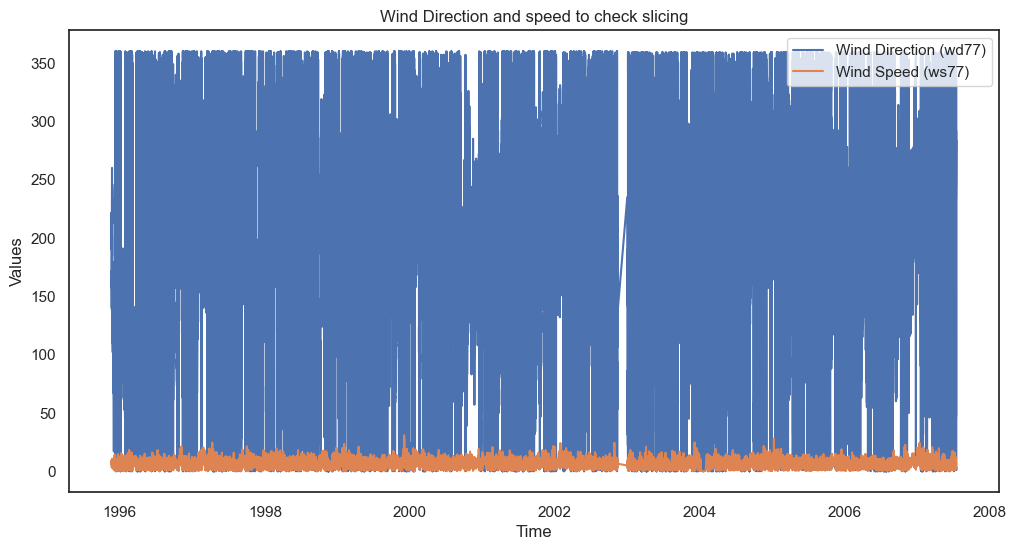

In [1443]:
wind_direction = wind_direction.loc[:'2007-07-19']
resampled_wind_speed = resampled_wind_speed.loc[:'2007-07-19']

plt.figure(figsize=(12, 6))
plt.plot(wind_direction.index, wind_direction, label='Wind Direction (wd77)')
plt.plot(resampled_wind_speed.index, resampled_wind_speed['ws77'], label='Wind Speed (ws77)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Wind Direction and speed to check slicing')
plt.legend()
plt.show()


In [1444]:
resampled_wind_direction = resample_interpolate_wind_direction(wind_direction, interpolate_method='time')

resampled_wind_direction.head()

,wd77
time,
1995-11-20 15:00:00,204.000076
1995-11-20 16:00:00,201.003152
1995-11-20 17:00:00,202.833228
1995-11-20 18:00:00,200.166908
1995-11-20 19:00:00,197.500508


In [1445]:
print(f"Amount of NaN values in wind speed: \n{resampled_wind_speed.isna().sum()}")
print(f"Amount of NaN values in wind direction: \n{resampled_wind_direction.isna().sum()}")

Amount of NaN values in wind speed: 
ws77    0
dtype: int64
Amount of NaN values in wind direction: 
wd77    0
dtype: int64


We will now interpolate again the data to clean the NaN values, so we can scale correctly.

## Scale data

It is time to scale the data since linear regression works best with scaled data. We use a MinMaxScaler to keep the outliers as part of the scale, to not change the distribution.

array([[<Axes: title={'center': 'ws77_scaled'}>,
        <Axes: title={'center': 'wd77'}>]], dtype=object)

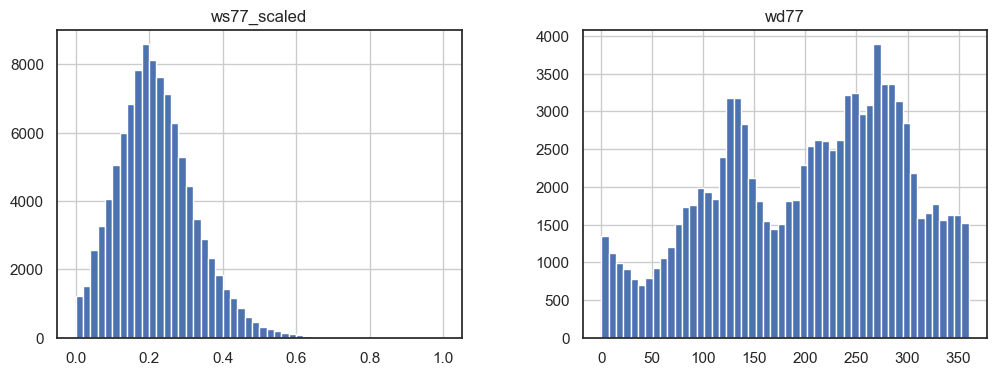

In [1446]:
scaler = MinMaxScaler()
scaled_wind_speed = pd.DataFrame(scaler.fit_transform(resampled_wind_speed), columns=resampled_wind_speed.columns, index=resampled_wind_speed.index)

resampled_scaled_wind_speed = resampled_wind_speed.copy()
resampled_scaled_wind_speed['ws77_scaled'] = scaled_wind_speed

resampled_scaled_mast_risoe = pd.concat([resampled_scaled_wind_speed, resampled_wind_direction], axis=1)

resampled_scaled_mast_risoe[['ws77_scaled', 'wd77']].hist(bins=50, figsize=(12,4))

## Feature engineering - radians and components

We decided to use radians instead of degrees for wind direction because the smaller range (0 to 2π) will likely simplify the model’s ability to capture patterns. This approach avoids issues with extremes, such as the discontinuity between 360 degrees and 0 degrees, which represent the same direction. Additionally, we are incorporating the U (east-west) and V (north-south) components of wind, providing a clearer representation of wind behavior.

In [1447]:
wind_features = pd.DataFrame()
wind_features['wd77_radians'] = np.radians(resampled_scaled_mast_risoe['wd77'])

wind_features['wd77_v'] = resampled_scaled_mast_risoe['ws77_scaled'] * np.sin(wind_features['wd77_radians'])
wind_features['wd77_u'] = resampled_scaled_mast_risoe['ws77_scaled'] * np.cos(wind_features['wd77_radians'])

Then we combine wind direction and wind speed together.

In [1448]:
resampled_scaled_mast_risoe = pd.concat([resampled_scaled_mast_risoe, wind_features], axis=1)

resampled_scaled_mast_risoe.head()

,ws77,ws77_scaled,wd77,wd77_radians,wd77_v,wd77_u
time,,,,,,
1995-11-20 15:00:00,3.467500,0.110055,204.000076,3.560473,-0.044764,-0.100540
1995-11-20 16:00:00,5.216667,0.166883,201.003152,3.508167,-0.059814,-0.155796
1995-11-20 17:00:00,6.288333,0.201700,202.833228,3.540108,-0.078270,-0.185895
1995-11-20 18:00:00,7.316667,0.235109,200.166908,3.493572,-0.081055,-0.220695
1995-11-20 19:00:00,7.943333,0.255469,197.500508,3.447034,-0.076823,-0.243644


Checking the result for any mistakes

In [1449]:
resampled_scaled_mast_risoe.dropna(inplace=True)
resampled_scaled_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102127 entries, 1995-11-20 15:00:00 to 2007-07-15 21:00:00
Freq: h
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ws77          102127 non-null  float64
 1   ws77_scaled   102127 non-null  float64
 2   wd77          102127 non-null  float64
 3   wd77_radians  102127 non-null  float64
 4   wd77_v        102127 non-null  float64
 5   wd77_u        102127 non-null  float64
dtypes: float64(6)
memory usage: 5.5 MB


Potting the final resampled data to visualize and check it. Also printing to 

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

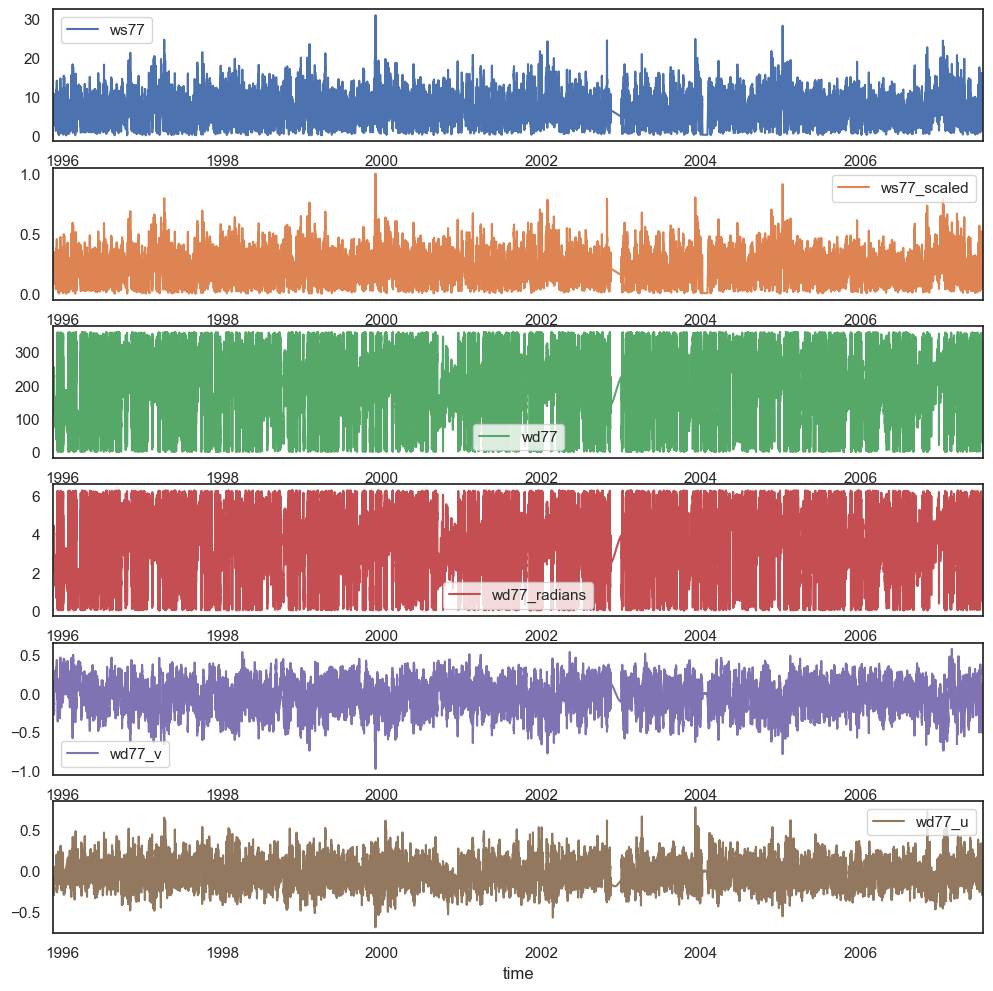

In [1450]:
resampled_scaled_mast_risoe.plot(subplots=True, figsize=(12,12), sharex=False, sharey=False)

# Work with Meso data 
## Load MESO Data

It is time to load the MESO data. We choose to only load the data that is needed, to reduce memory usage.

In [1451]:
# only load TIMESTAMP WSP060 WSP080 WDIR060 WDIR080
# convert TIMESTAMP to datetime and use it as index

meso_risoe = pd.read_csv(file_path_risoe_csv, usecols=['TIMESTAMP', 'WSP060', 'WSP080', 'WDIR060', 'WDIR080'], parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')


# sort dataframe by index
meso_risoe.sort_index(inplace=True)

meso_risoe.head()

,WSP060,WSP080,WDIR060,WDIR080
TIMESTAMP,,,,
2000-01-01 07:00:00,5.40,5.83,208.02,209.09
2000-01-01 08:00:00,5.67,6.13,203.13,204.21
2000-01-01 09:00:00,6.12,6.69,203.82,204.75
2000-01-01 10:00:00,5.84,6.37,210.63,211.50
2000-01-01 11:00:00,5.56,6.20,216.27,217.37


array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
      dtype=object)

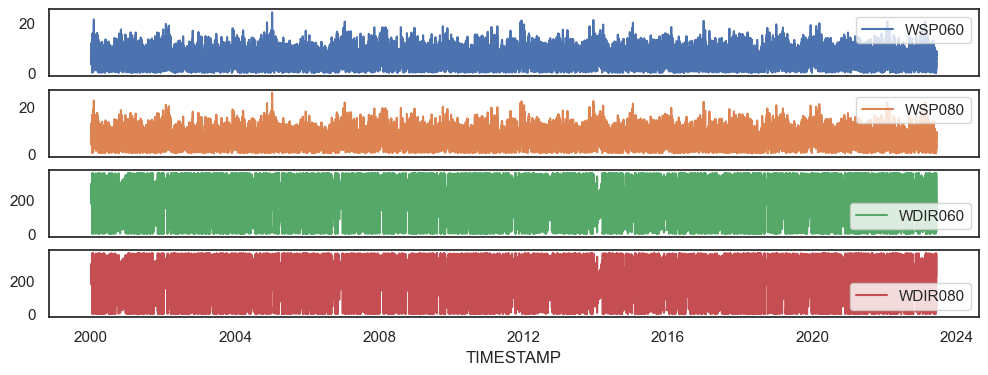

In [1452]:
# plot meso_risoe
meso_risoe.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

## Interpolate the wind speed height
We chose to try and interpolate the height to 77 for the MESO data. Then, we plotted the difference between the interpolated WSP077 and the original WSP080 to see how big of a difference there is. In the end, the difference is so small that interpolation is not needed.

array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>], dtype=object)

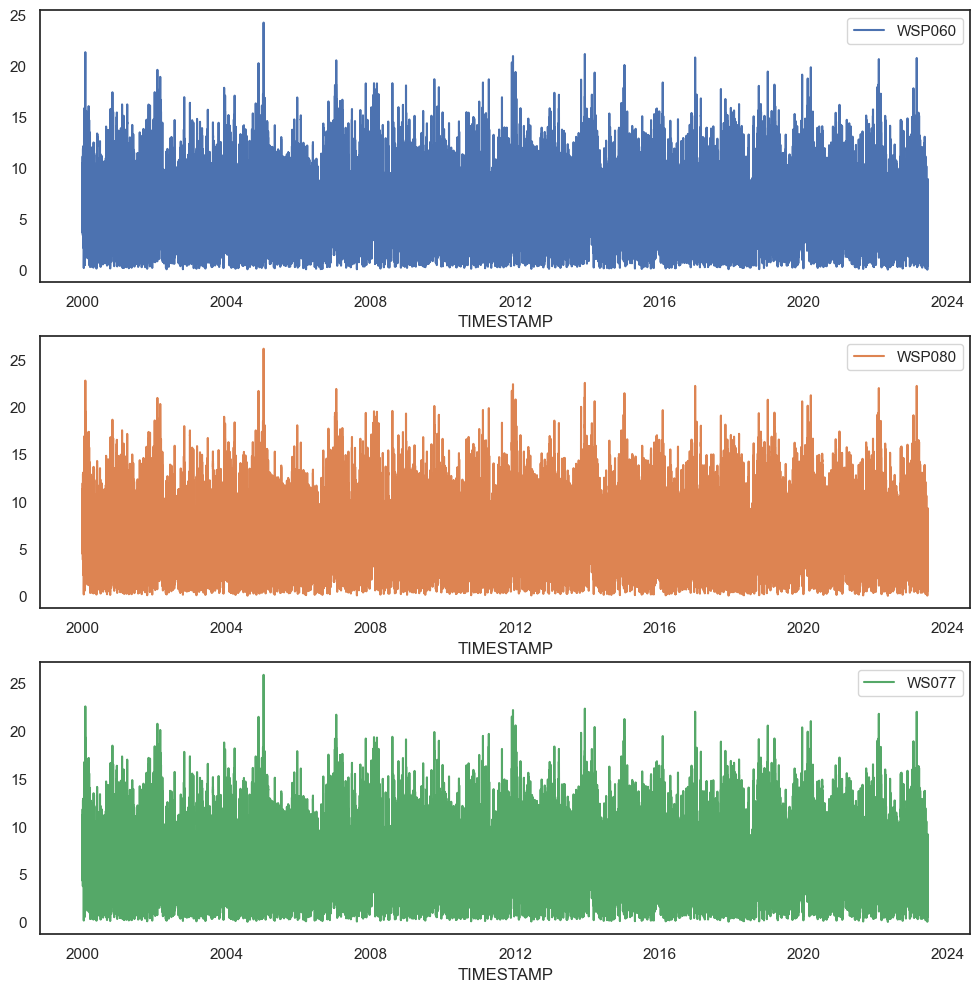

In [1453]:
target_height = 77

# Calculate the interpolation weight for WS060 and WS080
w_WS060 = (80 - target_height) / (80 - 60)
w_WS080 = (target_height - 60) / (80 - 60)

# Linearly interpolate WS060 and WS080 to WS077
meso_risoe.loc[:, 'WS077'] = (meso_risoe['WSP060'] * w_WS060) + (meso_risoe['WSP080'] * w_WS080)

# plot WS060 WS080 and WS077
meso_risoe[['WSP060', 'WSP080', 'WS077']].plot(subplots=True, figsize=(12,12), sharex=False, sharey=False)

<Axes: xlabel='TIMESTAMP'>

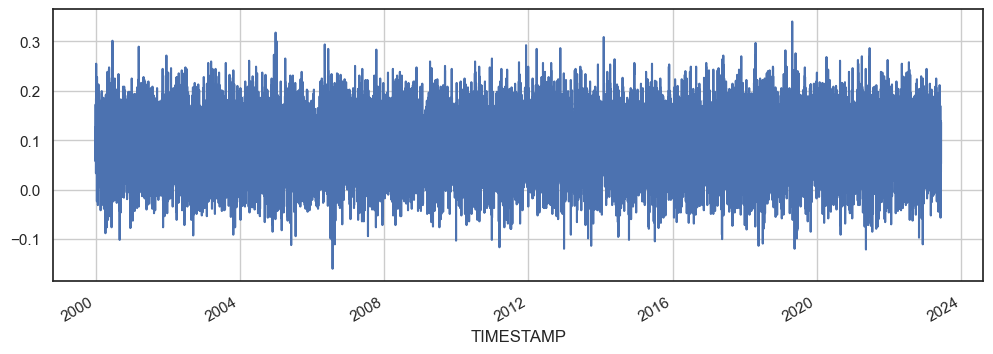

In [1454]:
# plot the difference between WSP080 and WS077
(meso_risoe['WSP080'] - meso_risoe['WS077']).plot(figsize=(12,4), grid=True)

## Interpolate the wind direction height

array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>], dtype=object)

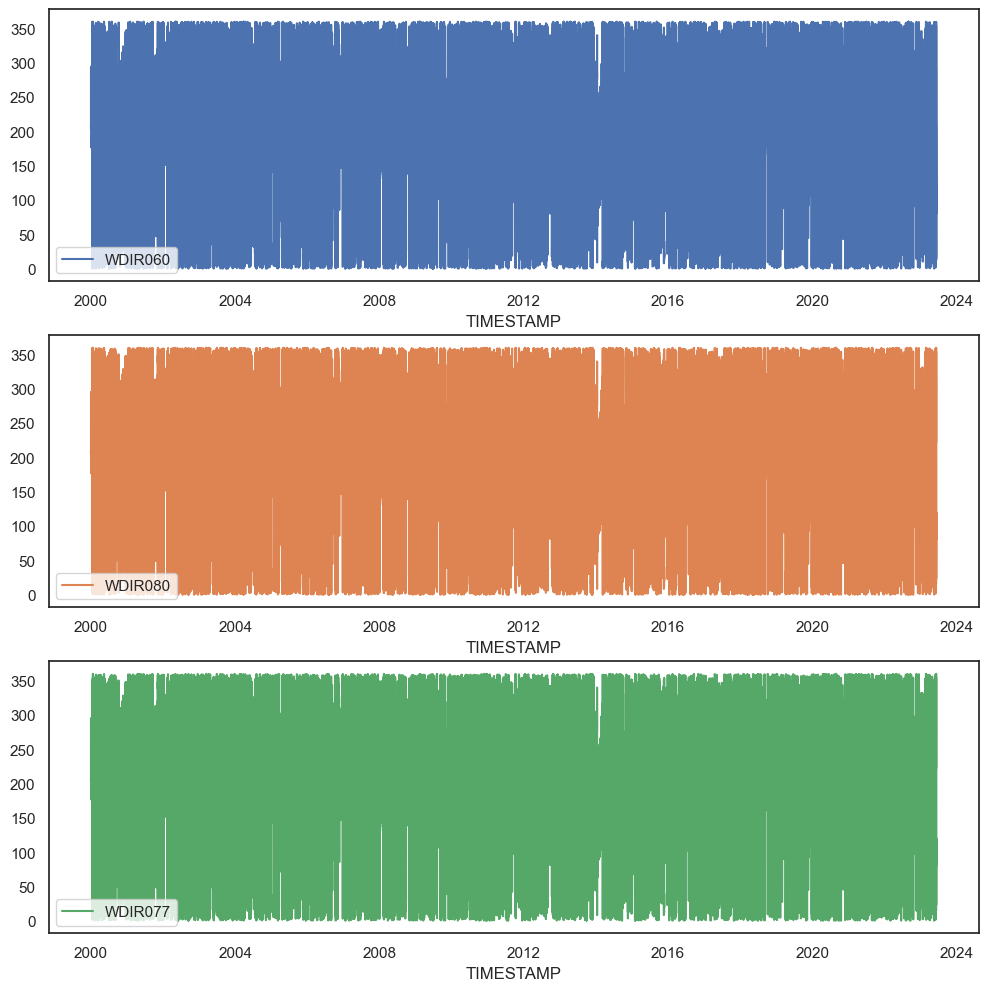

In [1455]:
# calculate the interpolated wind direction as an angle weighted average of WDIR060 and WDIR080
# first convert the angles to radians
# then calculate the interpolation weight for WDIR060 and WDIR080
# then calculate the angle weighted average of WDIR060 and WDIR080

meso_risoe.loc[:, 'WDIR060_rad'] = np.radians(meso_risoe['WDIR060'])
meso_risoe.loc[:, 'WDIR080_rad'] = np.radians(meso_risoe['WDIR080'])

w_WDIR060 = (80 - target_height) / (80 - 60)
w_WDIR080 = (target_height - 60) / (80 - 60)

meso_risoe.loc[:, 'WDIR077'] = (meso_risoe['WDIR060_rad'] * w_WDIR060) + (meso_risoe['WDIR080_rad'] * w_WDIR080)

# convret from radians to degrees

meso_risoe.loc[:, 'WDIR077'] = np.degrees(meso_risoe['WDIR077'])

# plot the result
meso_risoe[['WDIR060', 'WDIR080', 'WDIR077']].plot(subplots=True, figsize=(12,12), sharex=False, sharey=False)

<Axes: xlabel='TIMESTAMP'>

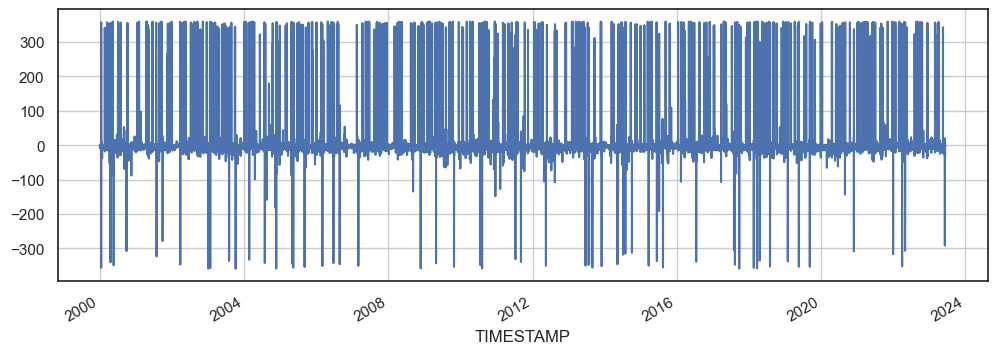

In [1456]:
# plot the difference bewteen WDIR060 and WDIR080  

(meso_risoe['WDIR060'] - meso_risoe['WDIR080']).plot(figsize=(12,4), grid=True)

In [1457]:
meso_risoe_77 = meso_risoe[['WS077', 'WDIR077']]

## Feature engineering for meso data

We will try to engineer some features to help us when training the models and also for future predictions. Among them will be scaling the wind speed, wind direction radians and u and v components, wind direction acording to the cardinal directions, etc.

First we will start with scaling the wind speed.

In [1458]:
meso_wind_speed = meso_risoe_77[['WS077']]
WS077_scaled = pd.DataFrame(scaler.fit_transform(meso_wind_speed), columns=meso_wind_speed.columns, index=meso_wind_speed.index)

scaled_meso_wind_speed = meso_risoe_77.copy()
scaled_meso_wind_speed["WS077_scaled"] = WS077_scaled
scaled_meso_wind_speed = scaled_meso_wind_speed.drop("WDIR077", axis=1)

scaled_meso_wind_speed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204288 entries, 2000-01-01 07:00:00 to 2023-06-11 06:00:00
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   WS077         204288 non-null  float64
 1   WS077_scaled  204288 non-null  float64
dtypes: float64(2)
memory usage: 4.7 MB


Here we calculate the radians, u, v component and magnitude.

In [1459]:
meso_wind_direction = meso_risoe_77[['WDIR077']]
meso_wind_direction['WDIR077_radians'] = np.radians(meso_wind_direction['WDIR077'])
meso_wind_direction['WDIR077_v'] = scaled_meso_wind_speed['WS077_scaled'] * np.sin(meso_wind_direction['WDIR077_radians'])
meso_wind_direction['WDIR077_u'] = scaled_meso_wind_speed['WS077_scaled'] * np.cos(meso_wind_direction['WDIR077_radians'])

meso_wind_direction['WDIR077_magnitude'] = np.sqrt(meso_wind_direction['WDIR077_u']**2 + meso_wind_direction['WDIR077_v']**2)
meso_wind_direction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204288 entries, 2000-01-01 07:00:00 to 2023-06-11 06:00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   WDIR077            204288 non-null  float64
 1   WDIR077_radians    204288 non-null  float64
 2   WDIR077_v          204288 non-null  float64
 3   WDIR077_u          204288 non-null  float64
 4   WDIR077_magnitude  204288 non-null  float64
dtypes: float64(5)
memory usage: 9.4 MB


Adding cardinal direction labels and one hot encoding them so they are ready for joining the meso and mast datasets.

In [1460]:
encoder = OneHotEncoder(sparse_output=False)

cardinal_direction = meso_wind_direction['WDIR077'].apply(get_cardinal_direction)

one_hot_encoded = encoder.fit_transform(cardinal_direction.values.reshape(-1, 1))

# Create a DataFrame with the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Cardinal_Direction']), index=meso_wind_direction.index)

# Concatenate the one-hot encoded columns to the original DataFrame
meso_wind_direction = pd.concat([meso_wind_direction, one_hot_encoded_df], axis=1)

meso_wind_direction.head()

,WDIR077,WDIR077_radians,WDIR077_v,WDIR077_u,WDIR077_magnitude,Cardinal_Direction_E,Cardinal_Direction_N,Cardinal_Direction_NE,Cardinal_Direction_NW,Cardinal_Direction_S,Cardinal_Direction_SE,Cardinal_Direction_SW,Cardinal_Direction_W
TIMESTAMP,,,,,,,,,,,,,
2000-01-01 07:00:00,208.9295,3.646508,-0.107468,-0.194441,0.222164,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 08:00:00,204.0480,3.561309,-0.095197,-0.213334,0.233610,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 09:00:00,204.6105,3.571127,-0.106054,-0.231529,0.254663,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 10:00:00,211.3695,3.689094,-0.126235,-0.207053,0.242500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 11:00:00,217.2050,3.790942,-0.142264,-0.187392,0.235276,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Combining the two datasets and checking for NAN values.

In [1461]:
scaled_meso_data = pd.concat([scaled_meso_wind_speed, meso_wind_direction], axis=1)

scaled_meso_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204288 entries, 2000-01-01 07:00:00 to 2023-06-11 06:00:00
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   WS077                  204288 non-null  float64
 1   WS077_scaled           204288 non-null  float64
 2   WDIR077                204288 non-null  float64
 3   WDIR077_radians        204288 non-null  float64
 4   WDIR077_v              204288 non-null  float64
 5   WDIR077_u              204288 non-null  float64
 6   WDIR077_magnitude      204288 non-null  float64
 7   Cardinal_Direction_E   204288 non-null  float64
 8   Cardinal_Direction_N   204288 non-null  float64
 9   Cardinal_Direction_NE  204288 non-null  float64
 10  Cardinal_Direction_NW  204288 non-null  float64
 11  Cardinal_Direction_S   204288 non-null  float64
 12  Cardinal_Direction_SE  204288 non-null  float64
 13  Cardinal_Direction_SW  204288 non-null  float64
 14  Ca

# Mast and Meso combining

## Slicing Meso and Mast data to use overlapping time periods

It is time to slice the data to only use the overlapping data from mast and MESO.

The loaded MESO data was originally not sorted by time, had some issues with it, but eventually figured it out, sorted it, and slicing went fine.

In [1462]:
print(f"Mast time period: {resampled_scaled_mast_risoe.index[0]} - {resampled_scaled_mast_risoe.index[-1]}")
print(f"Meso time period: {scaled_meso_data.index[0]} - {scaled_meso_data.index[-1]}")

Mast time period: 1995-11-20 15:00:00 - 2007-07-15 21:00:00
Meso time period: 2000-01-01 07:00:00 - 2023-06-11 06:00:00


In [1463]:
# slice meso_risoe to only include until the last index of resampled_scaled_mast_risoe
last_index = resampled_scaled_mast_risoe.index[-1]
meso_risoe_overlap = scaled_meso_data[:str(last_index)]

# plot overlap
meso_risoe_overlap.head()

,WS077,WS077_scaled,WDIR077,WDIR077_radians,WDIR077_v,WDIR077_u,WDIR077_magnitude,Cardinal_Direction_E,Cardinal_Direction_N,Cardinal_Direction_NE,Cardinal_Direction_NW,Cardinal_Direction_S,Cardinal_Direction_SE,Cardinal_Direction_SW,Cardinal_Direction_W
TIMESTAMP,,,,,,,,,,,,,,,
2000-01-01 07:00:00,5.7655,0.222164,208.9295,3.646508,-0.107468,-0.194441,0.222164,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 08:00:00,6.0610,0.233610,204.0480,3.561309,-0.095197,-0.213334,0.233610,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 09:00:00,6.6045,0.254663,204.6105,3.571127,-0.106054,-0.231529,0.254663,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 10:00:00,6.2905,0.242500,211.3695,3.689094,-0.126235,-0.207053,0.242500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 11:00:00,6.1040,0.235276,217.2050,3.790942,-0.142264,-0.187392,0.235276,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1464]:
# slice resampled_scaled_mast_risoe to only include from the first index of meso_risoe_overlap
resampled_scaled_mast_risoe_overlap = resampled_scaled_mast_risoe[meso_risoe.index[0]:]

# plot overlap
resampled_scaled_mast_risoe_overlap.head()

,ws77,ws77_scaled,wd77,wd77_radians,wd77_v,wd77_u
time,,,,,,
2000-01-01 07:00:00,6.573333,0.210959,183.502033,3.202715,-0.012886,-0.210566
2000-01-01 08:00:00,6.203333,0.198939,194.212940,3.389655,-0.048845,-0.192849
2000-01-01 09:00:00,6.701667,0.215129,201.995414,3.525485,-0.080573,-0.199470
2000-01-01 10:00:00,7.120000,0.228720,196.499314,3.429560,-0.064957,-0.219302
2000-01-01 11:00:00,6.541667,0.209931,201.003968,3.508181,-0.075246,-0.195982


## Join the meso and mast dataset
We join all the data together into one DataFrame, and after we introduce the months and seasons we will check for correlation between the different columns.

In [1465]:
# join the two dataframes together
joined_df = pd.concat([resampled_scaled_mast_risoe, meso_risoe_overlap], axis=1)

joined_df.dropna(inplace=True)

joined_df.head()

,ws77,ws77_scaled,wd77,wd77_radians,wd77_v,wd77_u,WS077,WS077_scaled,WDIR077,WDIR077_radians,...,WDIR077_u,WDIR077_magnitude,Cardinal_Direction_E,Cardinal_Direction_N,Cardinal_Direction_NE,Cardinal_Direction_NW,Cardinal_Direction_S,Cardinal_Direction_SE,Cardinal_Direction_SW,Cardinal_Direction_W
2000-01-01 07:00:00,6.573333,0.210959,183.502033,3.202715,-0.012886,-0.210566,5.7655,0.222164,208.9295,3.646508,...,-0.194441,0.222164,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 08:00:00,6.203333,0.198939,194.212940,3.389655,-0.048845,-0.192849,6.0610,0.233610,204.0480,3.561309,...,-0.213334,0.233610,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 09:00:00,6.701667,0.215129,201.995414,3.525485,-0.080573,-0.199470,6.6045,0.254663,204.6105,3.571127,...,-0.231529,0.254663,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 10:00:00,7.120000,0.228720,196.499314,3.429560,-0.064957,-0.219302,6.2905,0.242500,211.3695,3.689094,...,-0.207053,0.242500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-01-01 11:00:00,6.541667,0.209931,201.003968,3.508181,-0.075246,-0.195982,6.1040,0.235276,217.2050,3.790942,...,-0.187392,0.235276,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1466]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66015 entries, 2000-01-01 07:00:00 to 2007-07-15 21:00:00
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ws77                   66015 non-null  float64
 1   ws77_scaled            66015 non-null  float64
 2   wd77                   66015 non-null  float64
 3   wd77_radians           66015 non-null  float64
 4   wd77_v                 66015 non-null  float64
 5   wd77_u                 66015 non-null  float64
 6   WS077                  66015 non-null  float64
 7   WS077_scaled           66015 non-null  float64
 8   WDIR077                66015 non-null  float64
 9   WDIR077_radians        66015 non-null  float64
 10  WDIR077_v              66015 non-null  float64
 11  WDIR077_u              66015 non-null  float64
 12  WDIR077_magnitude      66015 non-null  float64
 13  Cardinal_Direction_E   66015 non-null  float64
 14  Cardinal_Direction_

## Joined data fit into Weibull-Distribution

Now we will plot the data to see how close it matches to the Weibull-Distribution.

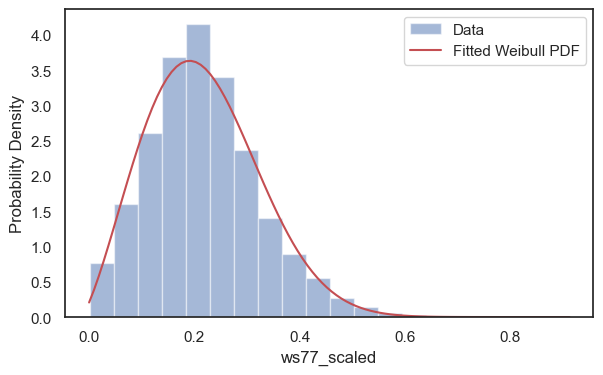

k: shape    2.326906
loc        -0.015500
a: scale    0.262952
dtype: float64


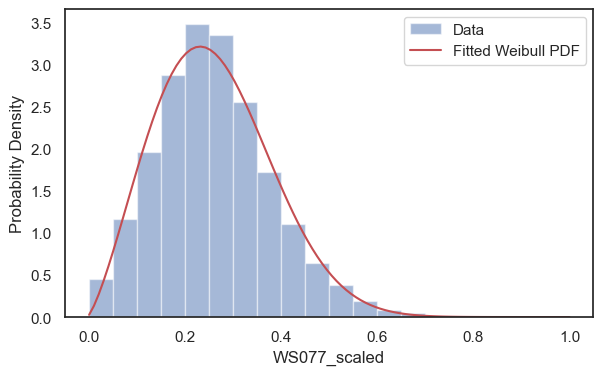

k: shape    2.340976
loc        -0.004257
a: scale    0.298805
dtype: float64


In [1467]:
for col in joined_df[['ws77_scaled', 'WS077_scaled']]:
    if joined_df[col].dtype == 'float64':
        print(fit_weibull(joined_df, col))

Seems like the wind speed follows very close the Weibull distribution.

## Feature engineering - months and seasons

To ensure that the training and test data are evenly distributed across all seasons, we performed one-hot encoding on the months to represent the season in which each record was taken. We also thought having seasons on the side would be nice.

In [1468]:

joined_df['season'] = joined_df.index.month.map(get_season)

one_hot_encoded_risoe_77 = pd.get_dummies(joined_df, columns=["season"], prefix='season')

one_hot_encoded_df = pd.get_dummies(joined_df.index.month, prefix='month')

# change index of one_hot_encoded_df to joined_df.index

one_hot_encoded_df.index = joined_df.index

# join them together

prepared_data = pd.concat([one_hot_encoded_risoe_77, one_hot_encoded_df], axis=1)

prepared_data.head()

,ws77,ws77_scaled,wd77,wd77_radians,wd77_v,wd77_u,WS077,WS077_scaled,WDIR077,WDIR077_radians,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2000-01-01 07:00:00,6.573333,0.210959,183.502033,3.202715,-0.012886,-0.210566,5.7655,0.222164,208.9295,3.646508,...,False,False,False,False,False,False,False,False,False,False
2000-01-01 08:00:00,6.203333,0.198939,194.212940,3.389655,-0.048845,-0.192849,6.0610,0.233610,204.0480,3.561309,...,False,False,False,False,False,False,False,False,False,False
2000-01-01 09:00:00,6.701667,0.215129,201.995414,3.525485,-0.080573,-0.199470,6.6045,0.254663,204.6105,3.571127,...,False,False,False,False,False,False,False,False,False,False
2000-01-01 10:00:00,7.120000,0.228720,196.499314,3.429560,-0.064957,-0.219302,6.2905,0.242500,211.3695,3.689094,...,False,False,False,False,False,False,False,False,False,False
2000-01-01 11:00:00,6.541667,0.209931,201.003968,3.508181,-0.075246,-0.195982,6.1040,0.235276,217.2050,3.790942,...,False,False,False,False,False,False,False,False,False,False


In [1469]:
# count number of 1 in each month column
print(f"Distribution of records by season: \n{prepared_data[['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']].sum()}\n")
print(f"Distribution of records by month: \n{prepared_data.iloc[:, -12:].sum()}")

Distribution of records by season: 
season_Fall      15288
season_Spring    17664
season_Summer    16486
season_Winter    16577
dtype: int64

Distribution of records by month: 
month_1     5945
month_2     5424
month_3     5952
month_4     5760
month_5     5952
month_6     5712
month_7     5566
month_8     5208
month_9     5040
month_10    5208
month_11    5040
month_12    5208
dtype: int64


We can see that the records were distributed in okay way between the seasons so we will proceed further.


In [1470]:
# Let's introduce also a feature for the wind speed outliers
Q1 = prepared_data['ws77'].quantile(0.25)
Q3 = prepared_data['ws77'].quantile(0.75)
IQR = Q3 - Q1
prepared_data['extreme'] = prepared_data['ws77'] > Q3 + 1.5 * IQR

# count extreme observations
prepared_data['extreme'].sum()

1123

# Correlation in data

<Axes: >

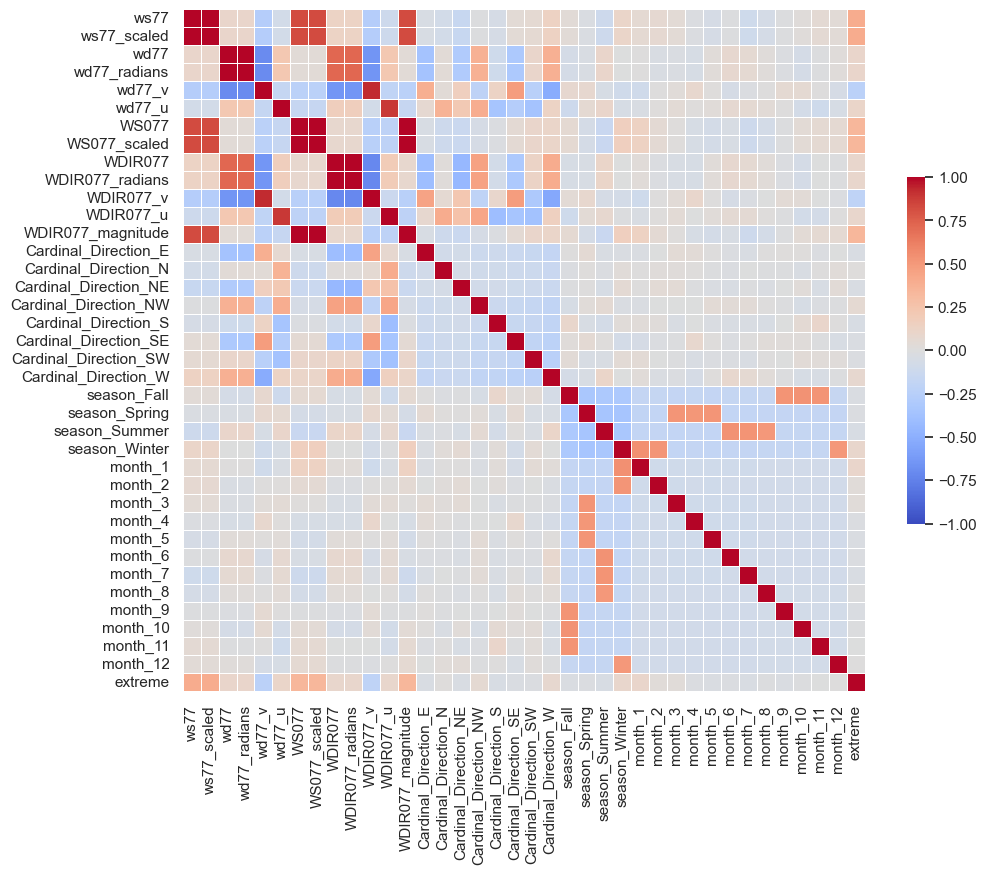

In [1471]:
sns.set_theme(style="white")
corr = prepared_data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


The seasons and months does not seem to have much influence onto the wind speed and direction, so will drop to reduce the matrix and see it from closer. For the purpose of clearer view we will drop also unscaled columns and others that just interfere with the view.

<Axes: >

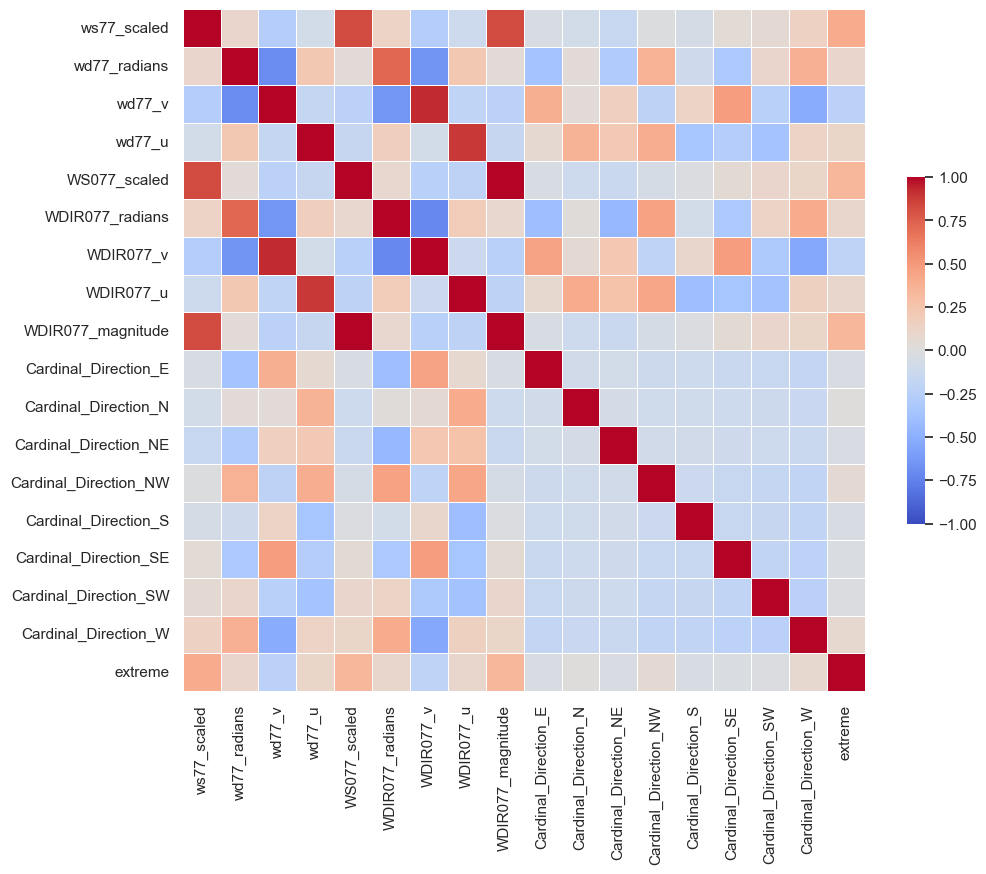

In [1472]:
prepared_data = prepared_data.drop(columns=['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'])
corr_data = prepared_data.drop(columns=['ws77', 'wd77', 'WS077', 'WDIR077'])

corr = corr_data.corr()

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix we can conclude that most influence for predicting the wind speed probably will have:
- Meso wind speed
- Some of the radians and components
- Wind magnitude
- Wind speed extremes

For the wind direction the correlated features are:
- The cardinal directions
- Meso wind direction
- Some of the Meso radians and components 
- Wind speed extremes also has some negative influence



# Model training

## Regresions for wind speed

In [1473]:
def train_and_evaluate_models(features, target, test_size=20, n_splits=5):
    X = features
    y = target

    print(f"Feature columns: {features.columns.to_list()}")

    # Prepare the test set on latest data
    test_size = int(test_size / 100 * len(X))
    X_train_val, X_test = X[:-test_size], X[-test_size:]
    y_train_val, y_test = y[:-test_size], y[-test_size:]

    # Now we can scale our data, avoiding data leakage
    scaler = StandardScaler()
    X_train_val_scaled = scaler.fit_transform(X_train_val)
    X_test_scaled = scaler.transform(X_test)

    # Define models with good start parameters
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(max_iter=10000) 
    }

    # Define hyperparameters for each model
    param_grids = {
        'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]},
        'Lasso': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]},
        'ElasticNet': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        }
    }

    # Variable to store RMSE and R² scores for each model and split
    model_rmse_scores = {model_name: [] for model_name in models}
    model_r2_scores = {model_name: [] for model_name in models}


    # TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Find best parameters for the models
    for model_name, model in models.items():

        if model_name != 'LinearRegression':
            grid_search = GridSearchCV(model, param_grids[model_name], cv=tscv, scoring='neg_mean_squared_error')
            grid_search.fit(X_train_val_scaled, y_train_val)
            models[model_name] = grid_search.best_estimator_
            print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Perform TimeSeriesSplit for cross-validation
    for train_index, val_index in tscv.split(X_train_val_scaled):
        X_train, X_val = X_train_val_scaled[train_index], X_train_val_scaled[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate each model
        for model_name, model in models.items():
            
            model.fit(X_train, y_train)

            y_val_pred = model.predict(X_val)
            
            # Compute RMSE on validation set
            model_rmse_scores[model_name].append(root_mean_squared_error(y_val, y_val_pred))

            # Compute R² on validation set
            model_r2_scores[model_name].append(r2_score(y_val, y_val_pred))

    # Evaluate each model on the final test set using full test + val set for training
    model_test_rmse = {}
    model_test_r2 = {}

    for model_name, model in models.items():
        
        models[model_name] = model.fit(X_train_val_scaled, y_train_val)

        y_test_pred = models[model_name].predict(X_test_scaled)
        test_rmse = root_mean_squared_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        model_test_rmse[model_name] = test_rmse
        model_test_r2[model_name] = test_r2


    # Output results
    for model_name in models:
        print(f"""
    {model_name}:
    RMSE on val / test: {np.mean(model_rmse_scores[model_name]):.15f} / {model_test_rmse[model_name]:.15f}
    R² on val / test:   {np.mean(model_r2_scores[model_name]):.15f} / {model_test_r2[model_name]:.15f}""")

    print(f"""
    Train set size: {len(X_train)}
    Validation set size: {len(X_val)}
    Test set size: {len(X_test)}""")

    return models, X_test_scaled, y_test, y_test_pred

In [1474]:
# Some variables for the training and testing
n_splits = 5
test_size = 15

features = pd.concat([prepared_data.iloc[:, 5:-9], prepared_data['extreme']], axis=1).drop(columns=['WS077', "WS077_scaled", 'WDIR077'])

target = one_hot_encoded_risoe_77['ws77_scaled']

models, X_test_scaled, y_test, y_test_pred = train_and_evaluate_models(features, target, test_size, n_splits)

Feature columns: ['wd77_u', 'WDIR077_radians', 'WDIR077_v', 'WDIR077_u', 'WDIR077_magnitude', 'extreme']
Best parameters for Ridge: {'alpha': 100.0}
Best parameters for Lasso: {'alpha': 0.001}
Best parameters for ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.5}

    LinearRegression:
    RMSE on val / test: 0.059916865219013 / 0.053840053294613
    R² on val / test:   0.661389958148375 / 0.768478303739853

    Ridge:
    RMSE on val / test: 0.059896632843054 / 0.053846622023611
    R² on val / test:   0.661629149612422 / 0.768421806914194

    Lasso:
    RMSE on val / test: 0.059828414585438 / 0.053833808164528
    R² on val / test:   0.662357398523591 / 0.768532010939802

    ElasticNet:
    RMSE on val / test: 0.059822674438204 / 0.053769451681793
    R² on val / test:   0.662396875036731 / 0.769085104322595

    Train set size: 46761
    Validation set size: 9352
    Test set size: 9902


To conclude, it seems like we got pretty good results using simple regression models instead of neural networks. We achieved an R² around 77%, meaning we are able to explain around 77% of the variance in the data. The RMSE is only 0.05 which is very satisfying. Interestingly, no matter whether we used OLS, Ridge regression, or Lasso regression, we got very similar results. While Lasso and ElasticNet introduce regularization, the effect is minimal, so probably sticking with Linear Regression or Ridge will be good as they are simpler models and do not need much tuning.

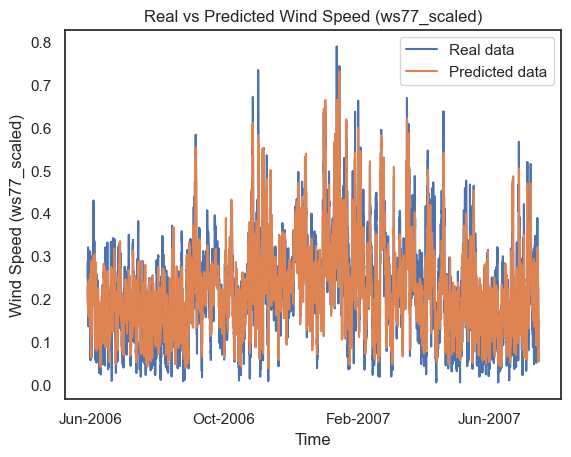

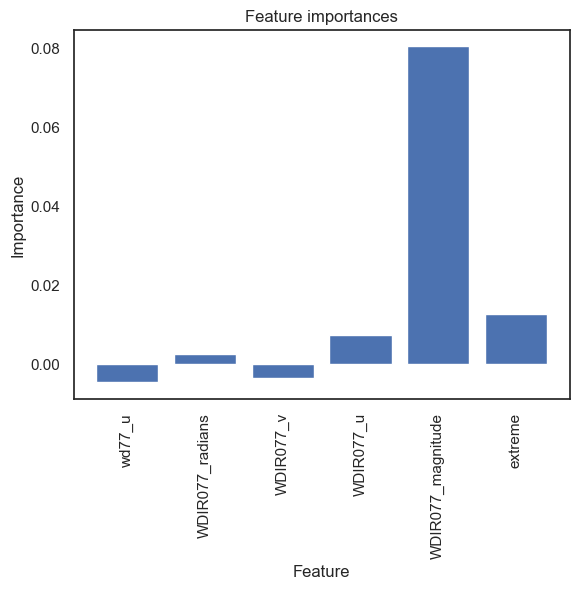

In [1475]:
chosen_model = models['LinearRegression']

y_test_pred = chosen_model.predict(X_test_scaled)

plot_real_vs_predicted(y_test, y_test_pred, 'Wind Speed (ws77_scaled)', 'Real vs Predicted Wind Speed (ws77_scaled)')
plot_feature_importances(chosen_model, features)

Seems like the wind magnitude of the Meso data is the most important feature when training the data. Which is not suprising consider it is calculated out of the wind speed and wind direction components. Pointing the outliers also helped for the model to better explain the data. It could be seen that the model follows very good the trend of the real data.

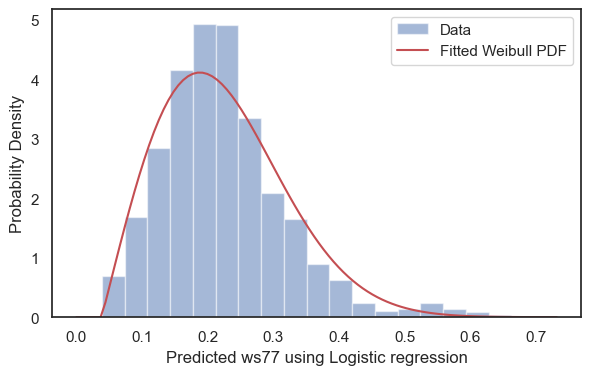

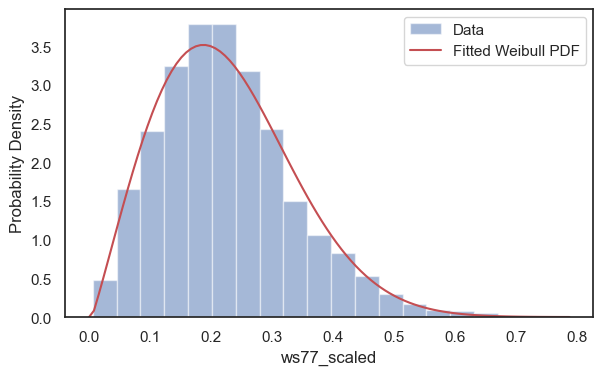

Error-in-K = 0.0629886581244401
Error-in-A = 0.040984314089240526


In [1476]:
k_shape_pred, loc_pred, a_scale_pred = fit_weibull(pd.DataFrame(y_test_pred, columns=['Predicted ws77 using Logistic regression']))

k_shape_real, loc_real, a_scale_real = fit_weibull(pd.DataFrame(y_test))

print(f"Error-in-K = {abs(k_shape_pred - k_shape_real)}")
print(f"Error-in-A = {abs(a_scale_pred - a_scale_real)}")

Our predicted wind speeds still quite nicely follow the Weibull distribution.

## Regressions for Wind Direction

In [1477]:
n_splits = 5
test_size = 10

features = prepared_data.iloc[:, 9:].drop(columns=['WDIR077_magnitude'])

target = one_hot_encoded_risoe_77['wd77_radians']

models, X_test_scaled, y_test, y_test_pred = train_and_evaluate_models(features, target, test_size, n_splits)

Feature columns: ['WDIR077_radians', 'WDIR077_v', 'WDIR077_u', 'Cardinal_Direction_E', 'Cardinal_Direction_N', 'Cardinal_Direction_NE', 'Cardinal_Direction_NW', 'Cardinal_Direction_S', 'Cardinal_Direction_SE', 'Cardinal_Direction_SW', 'Cardinal_Direction_W', 'extreme']
Best parameters for Ridge: {'alpha': 100.0}
Best parameters for Lasso: {'alpha': 0.0001}
Best parameters for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.1}

    LinearRegression:
    RMSE on val / test: 1.056286051024148 / 0.921692647874643
    R² on val / test:   0.562559157771098 / 0.615085720002744

    Ridge:
    RMSE on val / test: 1.056270967397989 / 0.921652893404932
    R² on val / test:   0.562575668411714 / 0.615118923550839

    Lasso:
    RMSE on val / test: 1.056294697505371 / 0.921691014762575
    R² on val / test:   0.562552527201026 / 0.615087084031415

    ElasticNet:
    RMSE on val / test: 1.056267022107026 / 0.921495108883683
    R² on val / test:   0.562586218296250 / 0.615250693501457

    Train set s

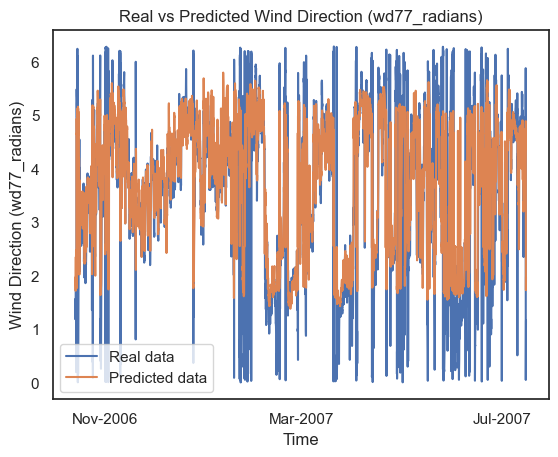

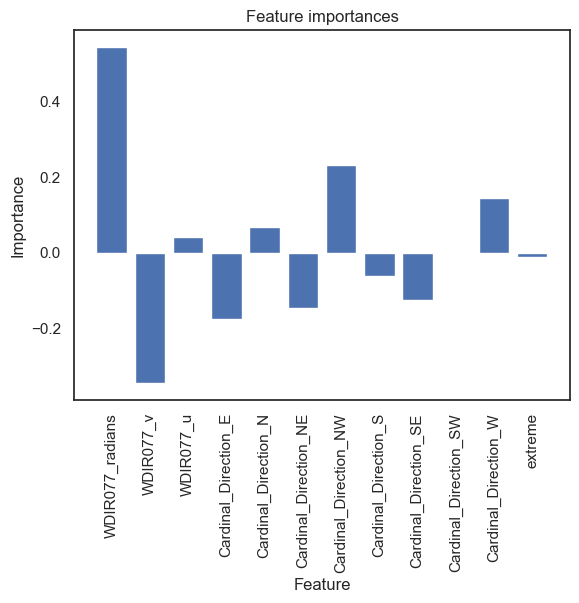

In [1478]:
chosen_model = models['LinearRegression']

y_test_pred = chosen_model.predict(X_test_scaled)

plot_real_vs_predicted(y_test, y_test_pred, 'Wind Direction (wd77_radians)', 'Real vs Predicted Wind Direction (wd77_radians)')
plot_feature_importances(chosen_model, features)

The wind direction model effectively captures the general trends of the real data, although it struggles to accurately represent the extremes. In this context, the extreme feature plays a relevant role, contributing positively, even if just slightly. As the wind direction does not fit into weibull distribution, because of its circular character and that is why we won't test it. 

The linear models performed very well on the dataset for both wind speed and wind direction. All the models follow the trend of the real data quite well, which is quite nice. Adjusting the test set higher or lower influences the model performance, so depending on what we want the model can sligthly perform better or worse, but both reducing and increasing the data in the end give satisfying results.

As an overall conclusion, using regression models to predict wind conditions could be beneficial for Vestas. While the R² scores may not capture all the variance for wind direction, the low RMSE demonstrates that these models are still very accurate. More importantly, this method provides a fast and simple way to get initial insights into wind patterns at a specific location. By employing these regression techniques, Vestas could potentially save significant time and resources in their forecasting efforts using Neural networks, which is crucial for optimizing wind farm development and operations.